# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | cabinda
Processing Record 3 of Set 1 | rayadrug
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | alta
Processing Record 6 of Set 1 | cidade velha
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | kolonia
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | rio gallegos
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | war

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,19.73,33,0,6.69,US,1683655980
1,cabinda,-5.5500,12.2000,26.98,88,37,3.58,AO,1683656212
2,rayadrug,14.7000,76.8667,26.46,65,100,2.27,IN,1683656213
3,whitehorse,60.7161,-135.0538,7.83,46,100,5.36,CA,1683655913
4,alta,69.9689,23.2717,8.59,77,0,3.09,NO,1683656214


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.73,33,0,6.69,US,1683655980
1,cabinda,-5.5500,12.2000,26.98,88,37,3.58,AO,1683656212
2,rayadrug,14.7000,76.8667,26.46,65,100,2.27,IN,1683656213
3,whitehorse,60.7161,-135.0538,7.83,46,100,5.36,CA,1683655913
4,alta,69.9689,23.2717,8.59,77,0,3.09,NO,1683656214


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

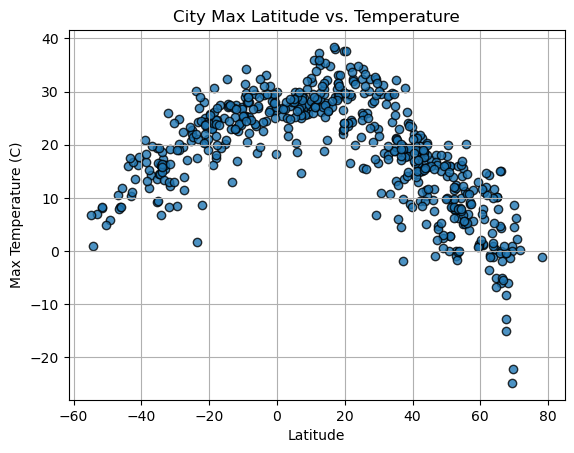

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

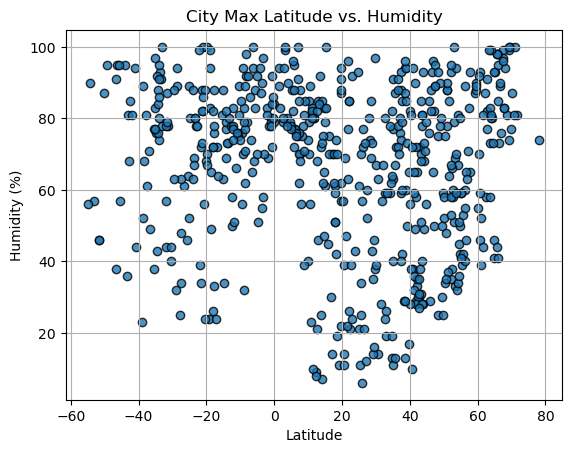

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

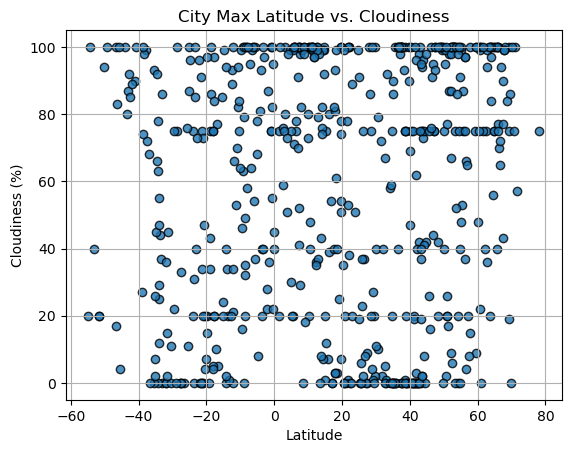

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

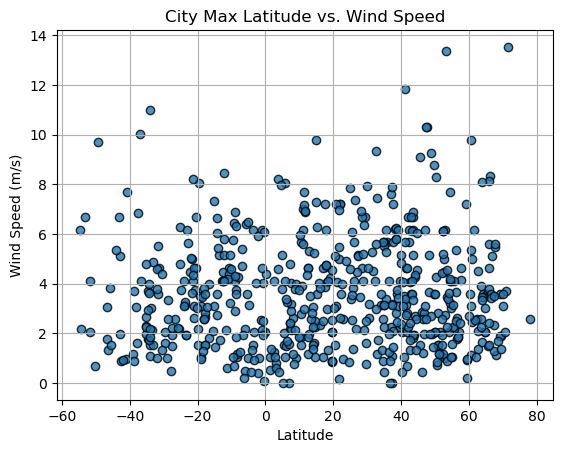

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, coordinates, y_label): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = f"y={str(round(slope,2))}x + {str(round(intercept,2))}"

    plt.scatter(x_values, y_values, linewidth=1, marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.73,33,0,6.69,US,1683655980
2,rayadrug,14.7000,76.8667,26.46,65,100,2.27,IN,1683656213
3,whitehorse,60.7161,-135.0538,7.83,46,100,5.36,CA,1683655913
4,alta,69.9689,23.2717,8.59,77,0,3.09,NO,1683656214
5,cidade velha,14.9167,-23.6167,26.26,61,20,9.77,CV,1683656214


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cabinda,-5.5500,12.2000,26.98,88,37,3.58,AO,1683656212
6,blackmans bay,-43.0167,147.3167,10.41,81,87,5.11,AU,1683655959
7,port-aux-francais,-49.3500,70.2167,5.79,95,100,9.70,TF,1683655947
11,rio gallegos,-51.6226,-69.2181,8.03,46,20,4.12,AR,1683656127
12,edinburgh of the seven seas,-37.0676,-12.3116,14.33,71,68,10.04,SH,1683656216


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8297006115831026


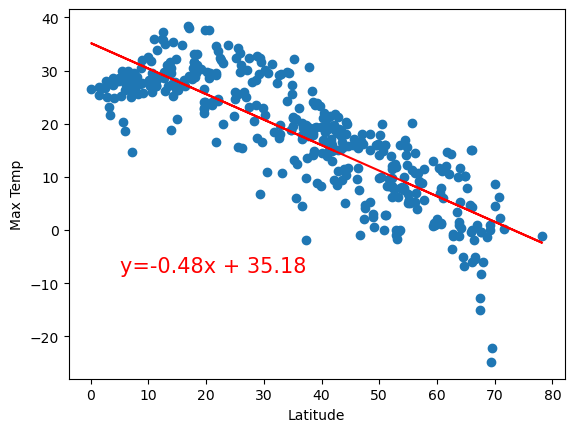

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
coordinates = (5, -8)

linear_regression_plot(x_values,y_values,coordinates, "Max Temp")

The r-value is: 0.7926530573987167


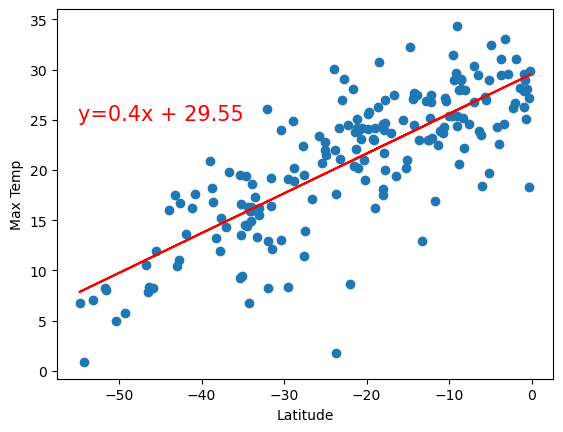

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
coordinates = (-55, 25)

linear_regression_plot(x_values,y_values,coordinates, "Max Temp")

**Discussion about the linear relationship:** The correlation between max temp and latitude is strong for both hemispheres. At an r-value of -0.83, the northern hemisphere has a slightly higher correlation, meaning that as you move away from the equator, the temperature decreases in more linearly than the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07111332592893638


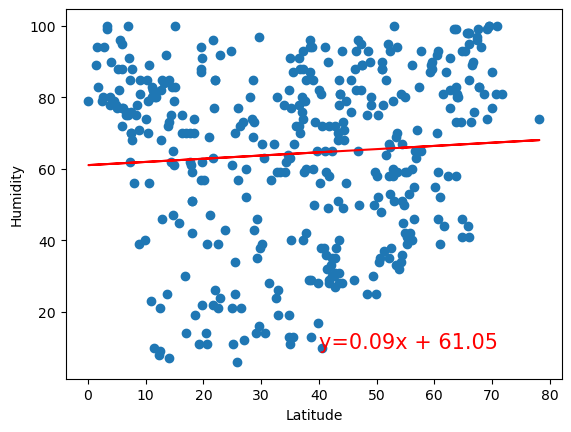

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
coordinates = (40, 10)

linear_regression_plot(x_values,y_values,coordinates, "Humidity")

The r-value is: 0.12654381411633764


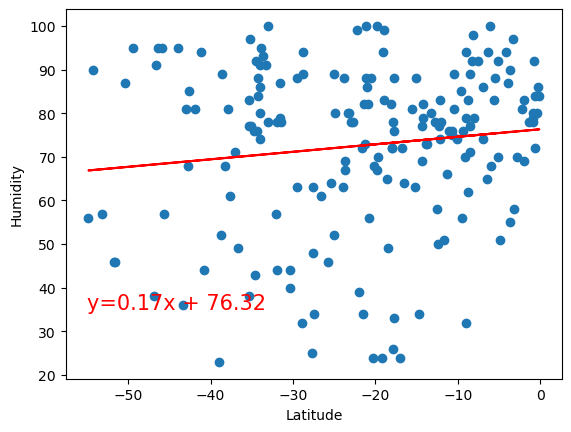

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
coordinates = (-55, 35)

linear_regression_plot(x_values,y_values,coordinates, "Humidity")

**Discussion about the linear relationship:** There is no correlation between latitude and humidity as the r-value is close to 0 for both the norhtern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08311175476633355


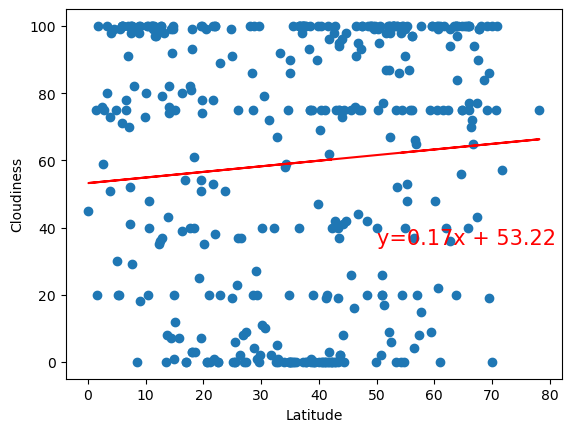

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
coordinates = (50, 35)

linear_regression_plot(x_values,y_values,coordinates, "Cloudiness")

The r-value is: 0.07668171595542637


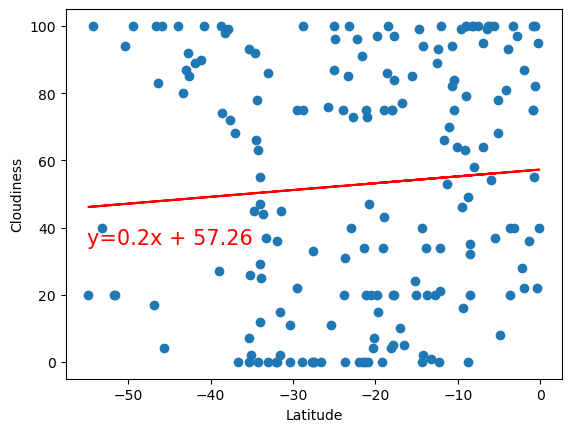

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
coordinates = (-55, 35)

linear_regression_plot(x_values,y_values,coordinates,"Cloudiness")

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness for both the southern and northern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016207738717773444


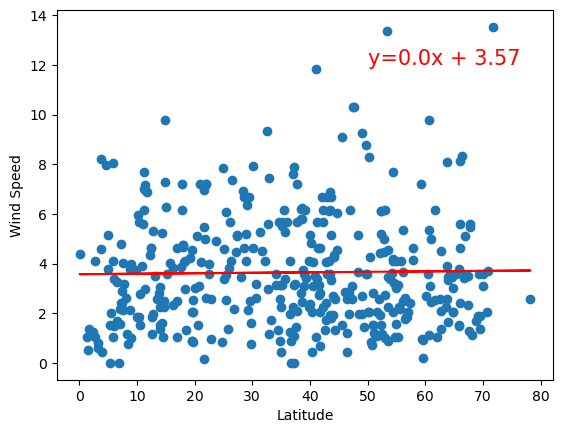

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
coordinates = (50, 12)

linear_regression_plot(x_values,y_values,coordinates, "Wind Speed")

The r-value is: -0.02632381763608843


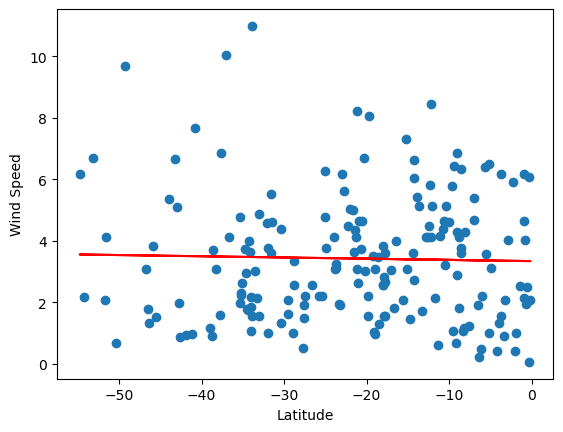

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
coordinates = (-55, 12)

linear_regression_plot(x_values,y_values,coordinates, 'Wind Speed')

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed either for both the northern and southern hemispheres.